In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv('../../data/olist_order_reviews_dataset.csv')
orders = pd.read_csv('../../data/olist_orders_dataset.csv')

In [3]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [4]:
merged = orders.merge(reviews[['order_id', 'review_score']], how='left', on='order_id')

In [5]:
nonEssentials = ['order_id', 'customer_id', 'order_status', 'order_approved_at', 'order_delivered_carrier_date']

merged.drop(nonEssentials, axis=1, inplace=True)

In [6]:
merged.head()

order_purchase_timestamp order_delivered_customer_date  \
0      2017-10-02 10:56:33           2017-10-10 21:25:13   
1      2018-07-24 20:41:37           2018-08-07 15:27:45   
2      2018-08-08 08:38:49           2018-08-17 18:06:29   
3      2017-11-18 19:28:06           2017-12-02 00:28:42   
4      2018-02-13 21:18:39           2018-02-16 18:17:02   

  order_estimated_delivery_date  review_score  
0           2017-10-18 00:00:00             4  
1           2018-08-13 00:00:00             4  
2           2018-09-04 00:00:00             5  
3           2017-12-15 00:00:00             5  
4           2018-02-26 00:00:00             5

In [7]:
merged.dtypes

order_purchase_timestamp         object
order_delivered_customer_date    object
order_estimated_delivery_date    object
review_score                      int64
dtype: object

In [8]:
def dt_to_date(df, cols):
    for col in cols : 
        df[col] = pd.to_datetime(df[col]).dt.date

In [9]:
cols_to_convert = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']
dt_to_date(merged, cols_to_convert)

In [10]:
merged.head()

order_purchase_timestamp order_delivered_customer_date  \
0               2017-10-02                    2017-10-10   
1               2018-07-24                    2018-08-07   
2               2018-08-08                    2018-08-17   
3               2017-11-18                    2017-12-02   
4               2018-02-13                    2018-02-16   

  order_estimated_delivery_date  review_score  
0                    2017-10-18             4  
1                    2018-08-13             4  
2                    2018-09-04             5  
3                    2017-12-15             5  
4                    2018-02-26             5

In [11]:
merged['delivery_diff'] = (merged.order_delivered_customer_date - merged.order_estimated_delivery_date).dt.days
merged['diff_abs'] = abs(merged.delivery_diff)
merged['delivery_time'] = (merged.order_delivered_customer_date - merged.order_purchase_timestamp).dt.days
merged['del_est_time'] = (merged.order_estimated_delivery_date - merged.order_purchase_timestamp).dt.days

In [12]:
merged.delivery_diff.fillna(merged.delivery_diff.mean(), inplace=True)
merged.diff_abs.fillna(merged.diff_abs.mean(), inplace=True)
merged.delivery_time.fillna(merged.delivery_time.mean(), inplace=True)
merged.del_est_time.fillna(merged.del_est_time.mean(), inplace=True)
merged

order_purchase_timestamp order_delivered_customer_date  \
0                   2017-10-02                    2017-10-10   
1                   2018-07-24                    2018-08-07   
2                   2018-08-08                    2018-08-17   
3                   2017-11-18                    2017-12-02   
4                   2018-02-13                    2018-02-16   
...                        ...                           ...   
99995               2017-03-09                    2017-03-17   
99996               2018-02-06                    2018-02-28   
99997               2017-08-27                    2017-09-21   
99998               2018-01-08                    2018-01-25   
99999               2018-03-08                    2018-03-16   

      order_estimated_delivery_date  review_score  delivery_diff  diff_abs  \
0                        2017-10-18             4           -8.0       8.0   
1                        2018-08-13             4           -6.0       6.0   
2                        2018-09-04             5          -18.0      18.0   
3                        2017-12-15             5          -13.0      13.0   
4                        2018-02-26             5          -10.0      10.0   
...                             ...           ...            ...       ...   
99995                    2017-03-28             5          -11.0      11.0   
99996                    2018-03-02             4           -2.0       2.0   
99997                    2017-09-27             5           -6.0       6.0   
99998                    2018-02-15             2          -21.0      21.0   
99999                    2018-04-03             5          -18.0      18.0   

       delivery_time  del_est_time  
0                8.0            16  
1               14.0            20  
2                9.0            27  
3               14.0            27  
4                3.0            13  
...              ...           ...  
99995            8.0            19  
99996           22.0            24  
99997           25.0            31  
99998           17.0            38  
99999            8.0            26  

[100000 rows x 8 columns]

In [13]:
merged.delivery_time.corr(merged.review_score)

-0.314418870993565

In [14]:
merged.del_est_time.corr(merged.review_score)

-0.054070989576670586

In [15]:
merged.delivery_diff.corr(merged.review_score)

-0.2525679596027229

In [16]:
merged.diff_abs.corr(merged.review_score)

0.03376126321211502

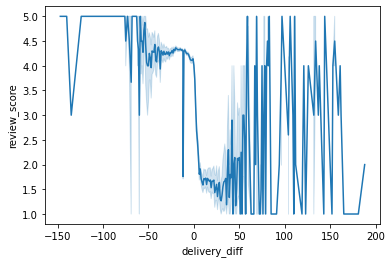

In [17]:
sns.lineplot(merged.delivery_diff, merged.review_score)

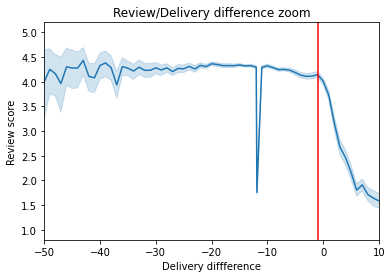

In [18]:
sns.lineplot(merged.delivery_diff, merged.review_score).set(title='Review/Delivery difference zoom', xlabel='Delivery diffference', ylabel='Review score', xlim=(-50,10))
plt.axvline(-1, color='red')

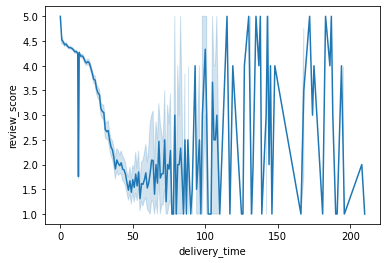

In [19]:
sns.lineplot(merged.delivery_time, merged.review_score)

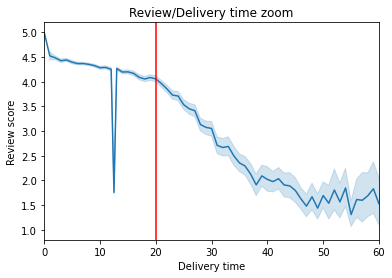

In [20]:
sns.lineplot(merged.delivery_time, merged.review_score).set(title='Review/Delivery time zoom', xlabel='Delivery time', ylabel='Review score', xlim=(0, 60))
plt.axvline(20, color='red')

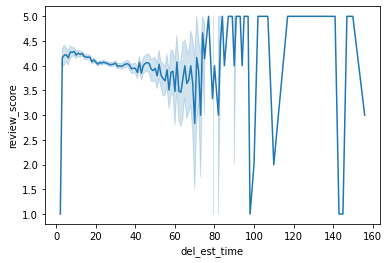

In [21]:
sns.lineplot(merged.del_est_time, merged.review_score)

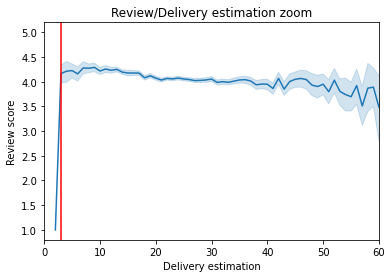

In [22]:
sns.lineplot(merged.del_est_time, merged.review_score).set(title='Review/Delivery estimation zoom', xlabel='Delivery estimation', ylabel='Review score', xlim=(0, 60))
plt.axvline(3, color='red')